In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

Part A

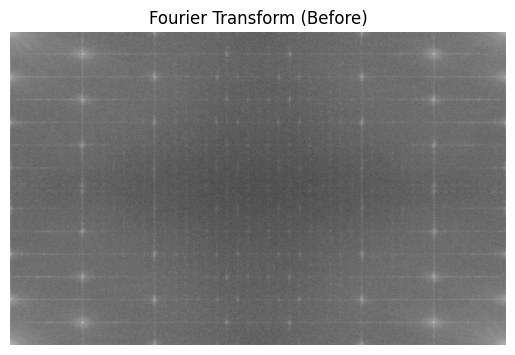

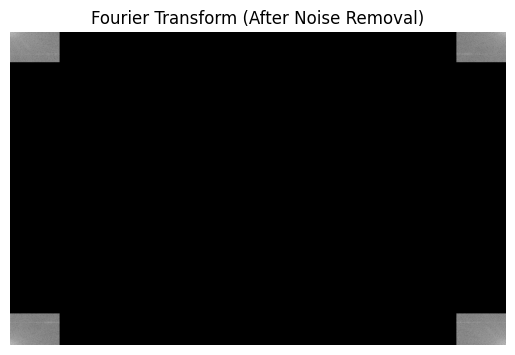

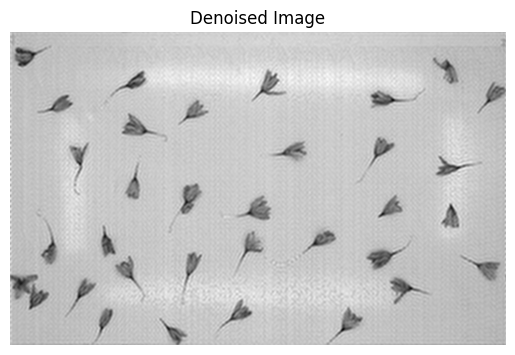

In [18]:
# Read the image
image = cv2.imread('saffrun.jpg', cv2.IMREAD_GRAYSCALE)

# Compute the 2D Fourier transform
fft_image = np.fft.fft2(image)

# Visualize the fourier transform
fourier_transform = np.log(1 + np.abs(fft_image))
plt.imshow(fourier_transform, cmap='gray')
plt.title('Fourier Transform (Before)')
plt.axis('off')
plt.show()

# Define the cutoff fraction for the noisy points to be removed
k = 0.1  # Adjust this value based on the amount of noise to be removed

# Identify the dimensions of the image
rows, cols = image.shape

# Apply the filter to remove noisy points
fft_image[int(rows * k):int(rows * (1 - k))] = 0
fft_image[:, int(cols * k):int(cols * (1 - k))] = 0

# Visualize the fourier transform after noise removal
fourier_transform_filtered = np.log(1 + np.abs(fft_image))
plt.imshow(fourier_transform_filtered, cmap='gray')
plt.title('Fourier Transform (After Noise Removal)')
plt.axis('off')
plt.show()

# Compute the inverse Fourier transform to obtain the denoised image
denoised_image = np.fft.ifft2(fft_image).real
denoised_image = np.uint8(denoised_image)

# Visualize the denoised image
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')
plt.axis('off')
plt.show()


Part B

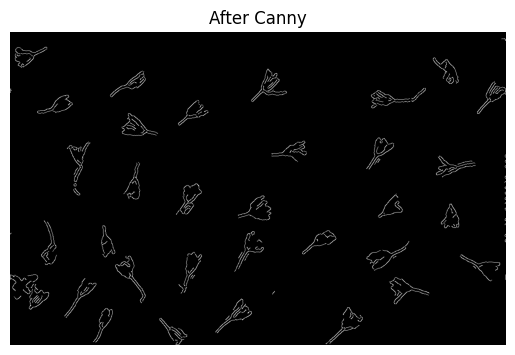

In [19]:
edges_detected_image = cv2.Canny(np.uint8(denoised_image), 50, 100);
plt.imshow(edges_detected_image, cmap='gray')
plt.title('After Canny')
plt.axis('off')
plt.show()


In [21]:
# Compute the gradient in the x and y directions
gradient_x = cv2.Sobel(edges_detected_image, cv2.CV_64F, 1, 0, ksize=5)
gradient_y = cv2.Sobel(edges_detected_image, cv2.CV_64F, 0, 1, ksize=5)

# Compute the magnitude and direction of the gradient
magnitude, direction = cv2.cartToPolar(gradient_x, gradient_y)

# Compute the direction of the gradients using the 2*arctan function
gradient_direction = np.arctan2(gradient_y, gradient_x)

# If you want to convert the result from radians to degrees use below code:
# gradient_direction = np.degrees(2 * np.arctan(gradient_y / (gradient_x + 0.0001)))  # Adding a small value to avoid division by zero

print(gradient_direction)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
